In [100]:
import pandas as pd
import numpy as np
df = pd.read_csv('cat.csv')

In [101]:
df = pd.DataFrame(df)
df

,Description,Rating,ReviewCount,Url
0,"PETLIBRO Automatic Cat Feeder for Two Cats, 5L...",4.5 out of 5 stars,4.5,https://amazon.com/gp/slredirect/picassoRedire...
1,QLIFE Automatic Cat Feeders WiFi: 3L Timed Dry...,4.6 out of 5 stars,4.6,https://amazon.com/gp/slredirect/picassoRedire...
2,Meow Mix Original Choice Dry Cat Food,4.7 out of 5 stars,4.7,https://amazon.com/Meow-Mix-Original-Dry-Food/...
3,Fancy Feast Purina Wet Cat Food Variety Packs,4.7 out of 5 stars,4.7,https://amazon.com/Purina-Fancy-Feast-Poultry-...
4,Purina ONE Tender Selects Blend Adult Dry Cat ...,4.8 out of 5 stars,4.8,https://amazon.com/Purina-Tender-Selects-Blend...
...,...,...,...,...
1459,"Purina Cat Chow High Protein Dry Cat Food, Com...",4.7 out of 5 stars,4.7,https://amazon.com/Purina-Cat-Chow-Complete-Fo...
1460,Purina Friskies Gravy Wet Cat Food Variety Pac...,4.7 out of 5 stars,4.7,https://amazon.com/Purina-Friskies-Variety-Shr...
1461,"Purina Friskies Wet Cat Food, Shreds With Salm...",4.7 out of 5 stars,4.7,https://amazon.com/Purina-Friskies-Shreds-Salm...
1462,"WOPET Automatic Cat Feeder, 2.4G WiFi Pet Food...",4.4 out of 5 stars,4.4,https://amazon.com/gp/slredirect/picassoRedire...


In [102]:
df['Description'] = df['Description'].str.replace("\'", "")
df['Description'] = df['Description'].str.replace("\''", "")
df['Rating'] = df['Rating'].str.replace("out of 5 stars", "")
df

,Description,Rating,ReviewCount,Url
0,"PETLIBRO Automatic Cat Feeder for Two Cats, 5L...",4.5,4.5,https://amazon.com/gp/slredirect/picassoRedire...
1,QLIFE Automatic Cat Feeders WiFi: 3L Timed Dry...,4.6,4.6,https://amazon.com/gp/slredirect/picassoRedire...
2,Meow Mix Original Choice Dry Cat Food,4.7,4.7,https://amazon.com/Meow-Mix-Original-Dry-Food/...
3,Fancy Feast Purina Wet Cat Food Variety Packs,4.7,4.7,https://amazon.com/Purina-Fancy-Feast-Poultry-...
4,Purina ONE Tender Selects Blend Adult Dry Cat ...,4.8,4.8,https://amazon.com/Purina-Tender-Selects-Blend...
...,...,...,...,...
1459,"Purina Cat Chow High Protein Dry Cat Food, Com...",4.7,4.7,https://amazon.com/Purina-Cat-Chow-Complete-Fo...
1460,Purina Friskies Gravy Wet Cat Food Variety Pac...,4.7,4.7,https://amazon.com/Purina-Friskies-Variety-Shr...
1461,"Purina Friskies Wet Cat Food, Shreds With Salm...",4.7,4.7,https://amazon.com/Purina-Friskies-Shreds-Salm...
1462,"WOPET Automatic Cat Feeder, 2.4G WiFi Pet Food...",4.4,4.4,https://amazon.com/gp/slredirect/picassoRedire...


In [103]:
from nltk.tokenize import SpaceTokenizer

In [104]:
tk = SpaceTokenizer()
br_cat = []
words= ['Blue','Buffalo','Purina','ONE','Chow','Friskies','Meow','Mix','Iams','Fancy','Feast','Beyond','Iams','Hills','Science', 'Diet']
    

In [105]:
for row in df.index:
    cat = df['Description'][row]
    
    item2 = [" ".join([w for w in tk.tokenize(cat) if w in words])]
    
    br_cat.append(item2)

In [106]:
df['Brand'] = pd.DataFrame(br_cat, columns = ['Brand'])

In [107]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [108]:
df = df.dropna()
df = df.drop(['Url','Description'], axis=1)
df

,Rating,ReviewCount,Brand
2,4.7,4.7,Meow Mix
3,4.7,4.7,Fancy Feast Purina
4,4.8,4.8,Purina ONE
5,4.7,4.7,Purina Friskies
6,4.7,4.7,Fancy Feast Purina
...,...,...,...
1457,4.7,4.7,Blue Buffalo
1458,4.5,4.5,Friskies Purina
1459,4.7,4.7,Purina Chow
1460,4.7,4.7,Purina Friskies


In [109]:
df = df.reindex(columns=list(df.columns)[::-1])

In [110]:
df.sort_values(by='ReviewCount', ascending=False)

,Brand,ReviewCount,Rating
772,Purina ONE,4.8,4.8
592,Purina ONE,4.8,4.8
610,Purina ONE,4.8,4.8
1231,Purina ONE,4.8,4.8
262,Purina ONE,4.8,4.8
...,...,...,...
1110,Friskies Purina,4.5,4.5
990,Friskies Purina,4.5,4.5
822,Friskies Purina,4.5,4.5
462,Friskies Purina,4.5,4.5


In [111]:
df = df.sort_values(by='Rating', ascending=False)

In [112]:
df['Brand'] = df['Brand'].str.replace("Purina Chow", "Purina Cat Chow")
df['Brand'] = df['Brand'].str.replace("Fancy Feast Purina", "Purina Fancy Feast")
df['Brand'] = df['Brand'].str.replace("Purina Fancy Feast Feast", "Purina Fancy Feast")
df['Brand'] = df['Brand'].str.replace("Fancy Feast Purina Feast", "Purina Fancy Feast")
df['Brand'] = df['Brand'].str.replace("Friskies", "Purina Friskies")
df['Brand'] = df['Brand'].str.replace("Purina Purina Friskies", "Purina Friskies")
df['Brand'] = df['Brand'].str.replace("Purina Friskies Purina", "Purina Friskies")

In [113]:
df["Brand"].value_counts()

Purina Friskies       250
Purina Fancy Feast    175
Hills Science Diet    175
Purina ONE            125
Purina Cat Chow       100
Meow Mix               50
Blue Buffalo           50
Purina                 25
Iams                    2
Name: Brand, dtype: int64

In [114]:
df.dtypes

Brand           object
ReviewCount    float64
Rating          object
dtype: object

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'

from IPython.core.display import HTML

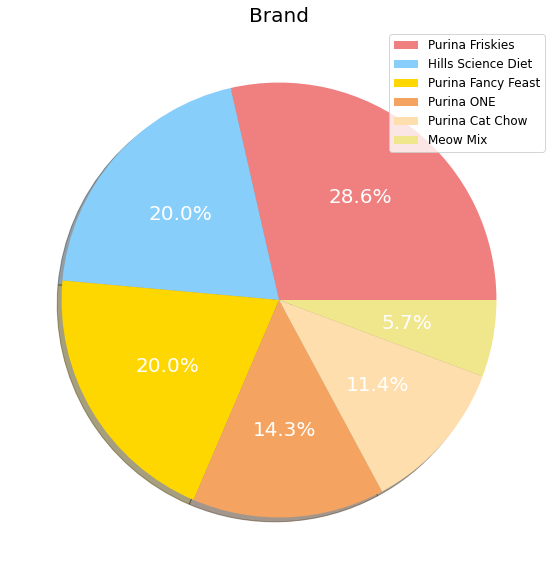

In [141]:
plt.subplots(figsize=(25, 10))
plt.pie(df.Brand.value_counts().nlargest(6), shadow=True, autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white'})
plt.title('Brand', size=20)
plt.legend(['Purina Friskies', 'Hills Science Diet', 'Purina Fancy Feast', 'Purina ONE', 'Purina Cat Chow', 'Meow Mix'], loc='best', fontsize=12)
plt.show()

In [119]:
df['Rating'] = df['Rating'].astype(float)

In [120]:
cat_totals = df.groupby("Brand")["Rating"].sum().sort_values()

In [121]:
cat_totals

Brand
Iams                     9.6
Purina                 115.0
Meow Mix               232.5
Blue Buffalo           237.5
Purina Cat Chow        475.0
Purina ONE             595.0
Hills Science Diet     822.5
Purina Fancy Feast     822.5
Purina Friskies       1170.0
Name: Rating, dtype: float64

<AxesSubplot:ylabel='Brand'>

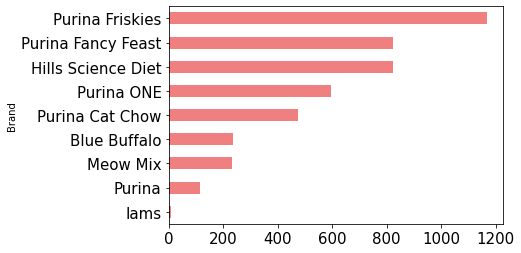

In [122]:
cat_totals.plot(kind="barh", fontsize=15)

In [123]:
cat_avgs = df.groupby("Brand")["Rating"].mean().sort_values()
cat_avgs

Brand
Purina                4.60
Meow Mix              4.65
Purina Friskies       4.68
Hills Science Diet    4.70
Purina Fancy Feast    4.70
Blue Buffalo          4.75
Purina Cat Chow       4.75
Purina ONE            4.76
Iams                  4.80
Name: Rating, dtype: float64

<AxesSubplot:ylabel='Brand'>

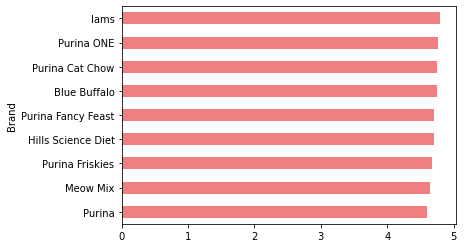

In [137]:
cat_avgs.plot(kind="barh", fontsize=10)